Parameter containing:
tensor([1., 1.], requires_grad=True)


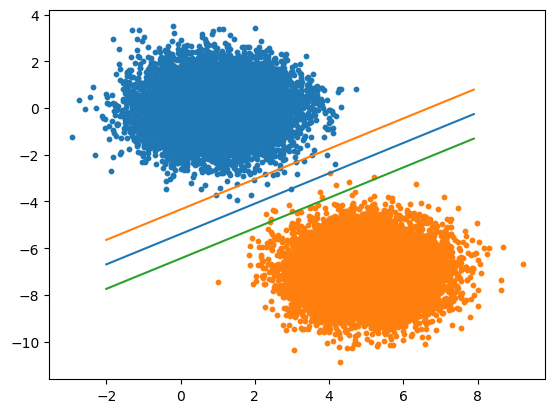

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(2)

class classify(nn.Module):
    def __init__(self,C=1):
        super(classify,self).__init__()
        self.w = nn.Parameter(torch.ones(2))
        self.b = nn.Parameter(torch.zeros(1))
        #C正相关越界点的个数
        self.C = C
        self.relu0 = nn.ReLU()
        self.relu1 = nn.ReLU()
    def forward(self,x0,x1):
        w2 = torch.pow(self.w,2).sum()
        x0 = 1-(torch.matmul(x0,self.w) + self.b)
        x1 = 1+(torch.matmul(x1,self.w) + self.b)
        loss = self.relu0(x0).sum() + self.relu1(x1).sum()
        return loss/ self.C + w2 
model = classify(3)
opt = optim.SGD(model.parameters(),lr = 0.001)

torch.manual_seed(8)
x0 = torch.randn(10000,2) + torch.randn(10000,2) * 0.1 + torch.tensor([1,0])
x1 = torch.randn(10000,2) + torch.randn(10000,2) * 0.01  + torch.tensor([5,-7])
for i in range(200):
    loss = model(x0,x1)
    opt.zero_grad()
    loss.backward()
    if i %1000 ==0:
        print(model.w)
    opt.step()

plt.scatter(x0[:,0],x0[:,1],s =10)
plt.scatter(x1[:,0],x1[:,1],s =10)

x = torch.arange(-2,8,0.1)
yy = -(model.w[0] * x + model.b)/model.w[1]
yy1 = -(model.w[0] * x + model.b-1)/model.w[1]
yy2 = -(model.w[0] * x + model.b+1)/model.w[1]

plt.plot(x,yy.data)
plt.plot(x,yy1.data)
plt.plot(x,yy2.data)
